# Bivariate EDA Analisis

### Key Business Questions:

1.  **Seasonal & Source Dynamics:** 
    How does production efficiency shift across seasons for each energy source? Specifically, does the inverse relationship between Solar (summer-peak) and Wind (often winter-peak) provide grid stability?

2.  **Long-Term Trends:** 
    Is there an observable year-over-year growth in total production capacity from 2020 to 2024? (Excluding the incomplete 2025 data to ensure fair comparison).


## Open the cleaned data

In [1]:
import pandas as pd

csv_filename = "cleaned-wind-and-solar-energy.csv"
df = pd.read_csv(csv_filename, index_col=0)

In [2]:
df.head()

,Source,Month_Name,Season,Production,Year,Month
0,Wind,November,Fall,5281,2025,11
1,Wind,November,Fall,3824,2025,11
2,Wind,November,Fall,3824,2025,11
3,Wind,November,Fall,6120,2025,11
4,Wind,November,Fall,4387,2025,11


## **Seasonal & Source Dynamics:** 

In [3]:
# Data frequency and proportions by Season and Source
# How many observations belong to this Season–Source combination?
crosstab_source_season = pd.crosstab(df["Season"], df["Source"])
display(crosstab_source_season)

crosstab_source_season_percent = round(pd.crosstab(df["Season"], df["Source"], normalize="index") * 100, 2)
display(crosstab_source_season_percent)


Source,Solar,Wind
Season,,
Fall,1961,11149
Spring,2547,10694
Summer,4172,9075
Winter,698,11566


Source,Solar,Wind
Season,,
Fall,14.96,85.04
Spring,19.24,80.76
Summer,31.49,68.51
Winter,5.69,94.31


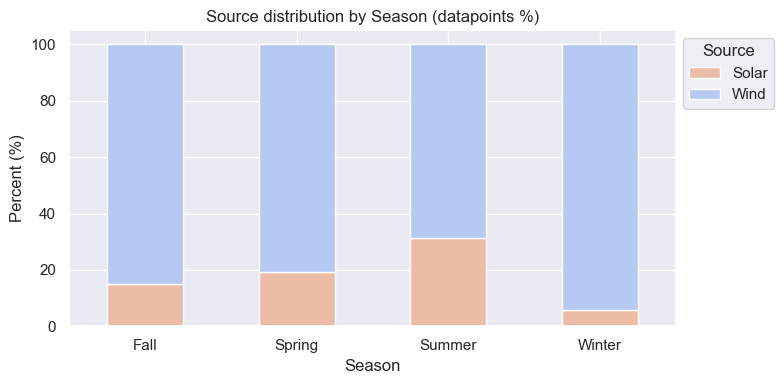

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
colors = ["#ecbca7", "#b6c9f3"]  # Solar, Wind

ax = crosstab_source_season_percent.plot(
    kind="bar",
    stacked=True,
    figsize=(8,4),
    color=colors,
)

plt.title("Source distribution by Season (datapoints %)")
plt.xlabel("Season")
plt.ylabel("Percent (%)")
plt.legend(title="Source", bbox_to_anchor=(1.0, 1), loc="upper left")
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.show()



In [5]:
from IPython.display import Markdown

report = f"""

### Initial exploration: Season vs. Source

When examining the percentage of energy source datapoints by season, wind dominates across all periods, with this trend particularly pronounced in winter.
Solar datapoints increase notably during summer months. While these percentages reflect dataset composition rather than actual production levels, they likely
correspond to periods of higher generation when more data is collected. It's worth noting that the original dataset contained no null or zero values, which may
explain the distribution patterns observed.

**The data reveals clear seasonal patterns:** solar records peak in summer ~{round(crosstab_source_season_percent.Solar.Summer,2)} and drop sharply in winter ~{round(crosstab_source_season_percent.Solar.Winter, 2)},
with spring and fall showing intermediate levels.
Wind energy follows the inverse pattern, reaching ~{round(crosstab_source_season_percent.Wind.Winter,2)} in winter and declining to ~{round(crosstab_source_season_percent.Wind.Summer,2)} in summer.

"""
display(Markdown(report))




### Initial exploration: Season vs. Source

When examining the percentage of energy source datapoints by season, wind dominates across all periods, with this trend particularly pronounced in winter.
Solar datapoints increase notably during summer months. While these percentages reflect dataset composition rather than actual production levels, they likely
correspond to periods of higher generation when more data is collected. It's worth noting that the original dataset contained no null or zero values, which may
explain the distribution patterns observed.

**The data reveals clear seasonal patterns:** solar records peak in summer ~31.49 and drop sharply in winter ~5.69,
with spring and fall showing intermediate levels.
Wind energy follows the inverse pattern, reaching ~94.31 in winter and declining to ~68.51 in summer.



### Production efficiency in relation to seasons and energy source

Text(0.5, 1.0, 'Average Production by Season')

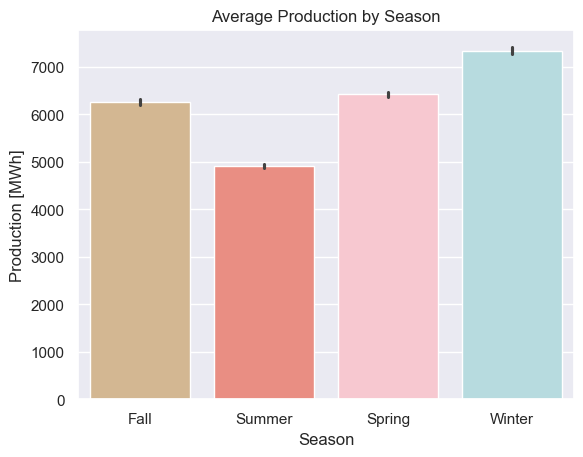

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colors based on the temperature of the month
seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}
season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            palette=seasons_palette,
            hue="Season",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season")

In [7]:
mean_prod_season = df[["Season","Production"]].groupby(["Season"]).mean()
mean_prod_season

,Production
Season,
Fall,6266.110908
Spring,6425.926969
Summer,4911.355779
Winter,7341.794684


In [8]:

report = f"""

### Insights: Average Production by Season

Consistent with the frequency of records observed earlier, average energy production peaks in Winter ({round(mean_prod_season.Production.Winter,2)}),
and drops in Summer ({round(mean_prod_season.Production.Summer,2)}) probably due to the dominance of the Wind source in the dataset.
This seasonal disparity might point to a grid instability if demand stays high during Summer months.  
"""
display(Markdown(report))



### Insights: Average Production by Season

Consistent with the frequency of records observed earlier, average energy production peaks in Winter (7341.79),
and drops in Summer (4911.36) probably due to the dominance of the Wind source in the dataset.
This seasonal disparity might point to a grid instability if demand stays high during Summer months.  


Text(0.5, 1.0, 'Average Production by Season and Source')

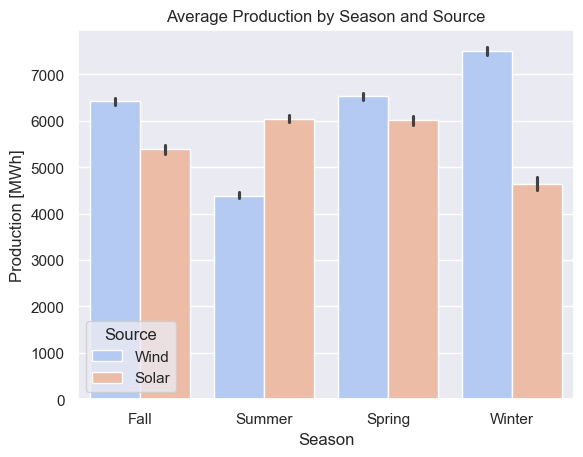

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

season_order = df.Season.unique()

sns.barplot(data = df,
            x = "Season",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            order=season_order)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season and Source")

In [10]:
report = f"""

### Observation: Average Production by Season and Source

Average energy production in Fall and Spring follows a similar pattern where Wind sources dominate,
though Solar production remains significant. As previously noted regarding Summer, Solar energy is more
prominent, whereas Wind energy dominates in Winter.
It is important to note that these values represent the **mean** output, not the total production volume.
 
"""
display(Markdown(report))



### Observation: Average Production by Season and Source

Average energy production in Fall and Spring follows a similar pattern where Wind sources dominate,
though Solar production remains significant. As previously noted regarding Summer, Solar energy is more
prominent, whereas Wind energy dominates in Winter.
It is important to note that these values represent the **mean** output, not the total production volume.



Text(0.5, 1.0, 'Boxplot: Production by Season and Source')

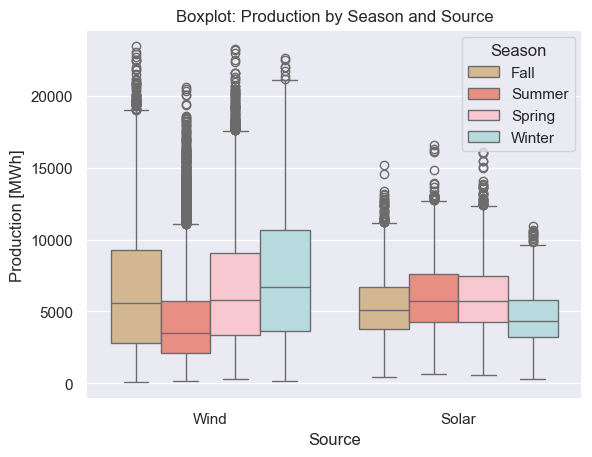

In [11]:
# seasons_palette = {"Fall": "burlywood", "Winter": "powderblue", "Summer": "salmon", "Spring": "pink"}

sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette=seasons_palette,
            hue = "Season",
            legend=True)

plt.ylabel("Production [MWh]")
plt.title ("Boxplot: Production by Season and Source")

In [12]:
# statistical data
summary = df[["Source", "Production", "Season"]].groupby(["Season", "Source"]).describe()
display(summary)

Production                                                   \
                   count         mean          std    min     25%     50%   
Season Source                                                               
Fall   Solar      1961.0  5386.830189  2327.507103  428.0  3762.0  5082.0   
       Wind      11149.0  6420.767782  4334.834702   58.0  2820.0  5581.0   
Spring Solar      2547.0  6009.738123  2440.833148  553.0  4238.0  5753.0   
       Wind      10694.0  6525.051057  3974.388910  274.0  3355.0  5767.5   
Summer Solar      4172.0  6044.805369  2418.667444  633.0  4259.5  5734.0   
       Wind       9075.0  4390.281212  3160.033830  140.0  2125.0  3484.0   
Winter Solar       698.0  4649.541547  1996.051987  267.0  3234.5  4370.0   
       Wind      11566.0  7504.270275  4599.198881  166.0  3653.0  6736.0   

                                  
                    75%      max  
Season Source                     
Fall   Solar    6730.00  15201.0  
       Wind     9299.00  23446.0  
Spring Solar    7495.50  16121.0  
       Wind     9054.00  23264.0  
Summer Solar    7623.00  16578.0  
       Wind     5706.50  20606.0  
Winter Solar    5816.25  10963.0  
       Wind    10647.00  22634.0

In [13]:
from IPython.display import Markdown

report = f"""

### Insights: Boxplot

In general terms, Wind production exhibits significantly higher variability across all seasons, characterized by a wider interquartile range (IQR) and a high frequency of extreme outliers.
This volatility suggests that while Wind can generate massive peaks (exceeding 20,000 MWh), it is less predictable.
In contrast, Solar energy displays a more stable profile with a narrower IQR and fewer extreme outliers.
Notably, the median Solar production remains surprisingly consistent across seasons, indicating a more reliable output compared to the Wind.
It is important to note that these patterns are specific to France. Other regions may exhibit significantly different seasonal profiles depending on their latitude and local climate.
"""
display(Markdown(report))




### Insights: Boxplot

In general terms, Wind production exhibits significantly higher variability across all seasons, characterized by a wider interquartile range (IQR) and a high frequency of extreme outliers.
This volatility suggests that while Wind can generate massive peaks (exceeding 20,000 MWh), it is less predictable.
In contrast, Solar energy displays a more stable profile with a narrower IQR and fewer extreme outliers.
Notably, the median Solar production remains surprisingly consistent across seasons, indicating a more reliable output compared to the Wind.
It is important to note that these patterns are specific to France. Other regions may exhibit significantly different seasonal profiles depending on their latitude and local climate.


### Grid Stability

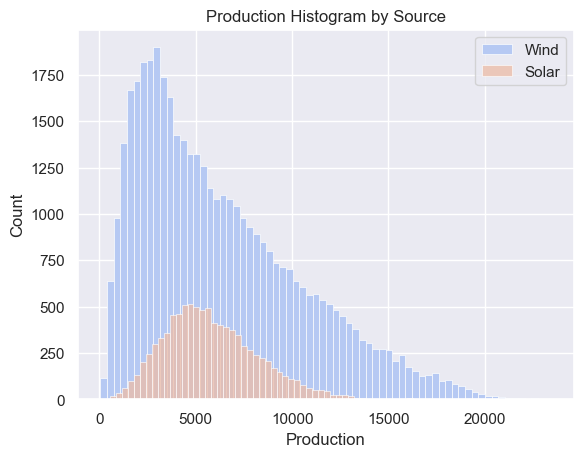

In [14]:
wind = df[df.Source == "Wind"]
solar = df[df.Source == "Solar"]

sns.histplot(data = wind, x = "Production", bins="auto", color="#b6c9f3", alpha=1, label = "Wind")
sns.histplot(data = solar, x = "Production", bins="auto", color="#ecbca7", label = "Solar")
colors = ["#ecbca7", "#b6c9f3"]  # Wind, Solar

plt.title("Production Histogram by Source")
plt.legend()
plt.show()



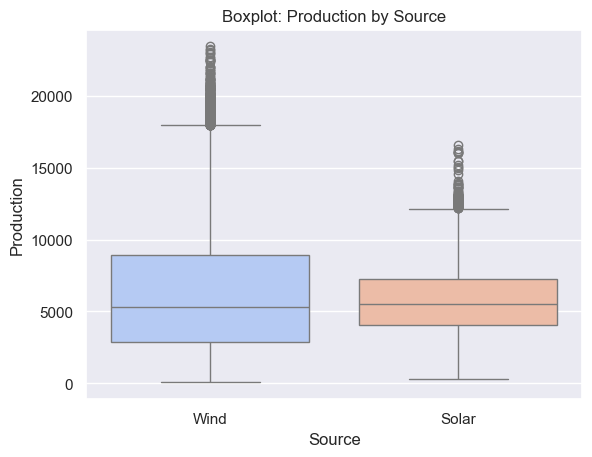

In [15]:
sns.boxplot(df,
            y = "Production",
            x = "Source",
            palette="coolwarm",
            hue = "Source",
            legend=False)

plt.title("Boxplot: Production by Source")
plt.show()


In [16]:
from IPython.display import Markdown

report = f"""

### Insight: Wind and Solar energy distribution 

The histogram reveals two distinct patterns: Solar production approximates a Gaussian distribution, whereas Wind energy exhibits a strong right-skew.
This confirms the trends observed in the univariate analysis of the global histogram.

**Implications for Capacity and Stability**
The significant difference in amplitude between the two sources highlights a major imbalance in the dataset,
confirming that current Solar capacity is insufficient to offset drops in total energy production.
To compensate for energy deficits in colder months, it would be beneficial to invest in a mixed portfolio
of additional power sources.

**Reliability Analysis**

While average Solar production dips in winter, it maintains significant output levels throughout all seasons.
This resilience is corroborated by the boxplots (both seasonal and aggregate), where the median production for Solar and Wind is remarkably similar in magnitude.
However, the Wind source displays a significantly wider Interquartile Range (IQR) and more frequent outliers. 

**Conclusion**

This contrast indicates that Solar energy offers a more consistent and feasible alternative for grid stability,
provided that overall demand remains high. 

> *Note: In this context, "grid stability" refers to the consistency of supply generation. An analysis of hourly demand matching is outside the scope of this report.*

"""
display(Markdown(report))



### Insight: Wind and Solar energy distribution 

The histogram reveals two distinct patterns: Solar production approximates a Gaussian distribution, whereas Wind energy exhibits a strong right-skew.
This confirms the trends observed in the univariate analysis of the global histogram.

**Implications for Capacity and Stability**
The significant difference in amplitude between the two sources highlights a major imbalance in the dataset,
confirming that current Solar capacity is insufficient to offset drops in total energy production.
To compensate for energy deficits in colder months, it would be beneficial to invest in a mixed portfolio
of additional power sources.

**Reliability Analysis**

While average Solar production dips in winter, it maintains significant output levels throughout all seasons.
This resilience is corroborated by the boxplots (both seasonal and aggregate), where the median production for Solar and Wind is remarkably similar in magnitude.
However, the Wind source displays a significantly wider Interquartile Range (IQR) and more frequent outliers. 

**Conclusion**

This contrast indicates that Solar energy offers a more consistent and feasible alternative for grid stability,
provided that overall demand remains high. 

> *Note: In this context, "grid stability" refers to the consistency of supply generation. An analysis of hourly demand matching is outside the scope of this report.*



## **Long-Term Trends:** 

Is there an observable year-over-year growth in total production capacity from 2020 to 2025?

In [17]:
# Total Year Production by year and production source
df[["Year", "Source", "Production"]].groupby(["Year", "Source"]).agg(["sum", "mean", "median", "std"])

Production                                  
                   sum         mean  median          std
Year Source                                             
2020 Solar     4700080  3900.481328  3899.0  1296.497735
     Wind     42202441  5569.073766  4931.5  3425.617308
2021 Solar     6458219  4484.874306  4470.5  1643.173441
     Wind     39259471  5363.315710  4504.5  3591.438148
2022 Solar    10555892  5684.379106  5679.0  1963.833835
     Wind     39189831  5678.039844  4545.5  3929.231618
2023 Solar     9715845  6525.080591  6530.0  2220.664851
     Wind     53744024  7391.558795  6679.0  4682.096505
2024 Solar    10420592  6195.357907  6091.5  2446.135402
     Wind     48705535  6858.002675  5799.5  4747.794271
2025 Solar    12484057  7322.027566  7138.0  2682.526557
     Wind     44898926  7114.391697  6113.0  4480.914924

Text(0.5, 1.0, 'Total Production from 2020-2025')

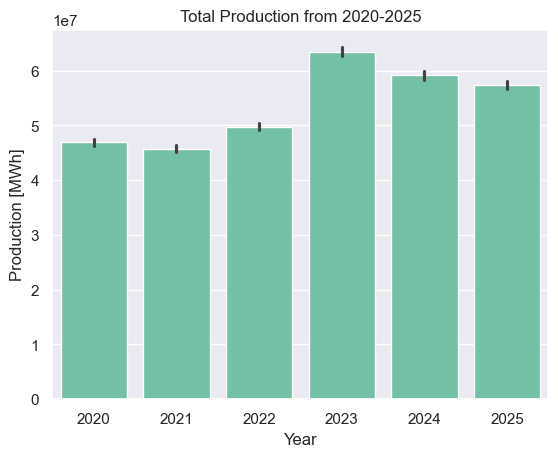

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            color="mediumaquamarine",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

In [19]:
from IPython.display import Markdown

report = f"""

### Observation: Total production by year

Total energy production has generally trended upward over the observed period, though not linearly.
The data shows significant oscillation, most notably a distinct production peak in 2023.
This volatility appears to be heavily influenced by the Wind sector,
which—as noted in previous sections—is inherently less predictable and exhibits greater fluctuations than Solar.

"""
display(Markdown(report))



### Observation: Total production by year

Total energy production has generally trended upward over the observed period, though not linearly.
The data shows significant oscillation, most notably a distinct production peak in 2023.
This volatility appears to be heavily influenced by the Wind sector,
which—as noted in previous sections—is inherently less predictable and exhibits greater fluctuations than Solar.



Text(0.5, 1.0, 'Mean Production by Source from 2020-2025')

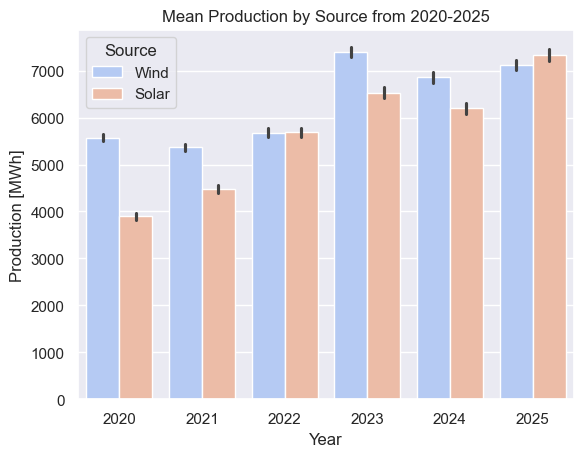

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='mean')

plt.ylabel("Production [MWh]")
plt.title ("Mean Production by Source from 2020-2025")

# By mean production they are less different

In [21]:
from IPython.display import Markdown

report = f"""
### Observation: Mean production by source and year

Disaggregating the data reveals two distinct trends:
* **Solar Energy:** Shows a trend of increase in annual production, even with a small dip in 2024,reflecting general growth.
* **Wind Energy:** Exhibits high volatility and oscillating production.

**Key Insight on Scale:**
The mean production from Wind and Solar are comparable in magnitude.

"""

display(Markdown(report))


### Observation: Mean production by source and year

Disaggregating the data reveals two distinct trends:
* **Solar Energy:** Shows a trend of increase in annual production, even with a small dip in 2024,reflecting general growth.
* **Wind Energy:** Exhibits high volatility and oscillating production.

**Key Insight on Scale:**
The mean production from Wind and Solar are comparable in magnitude.



Text(0.5, 1.0, 'Total Production by Source from 2020-2025')

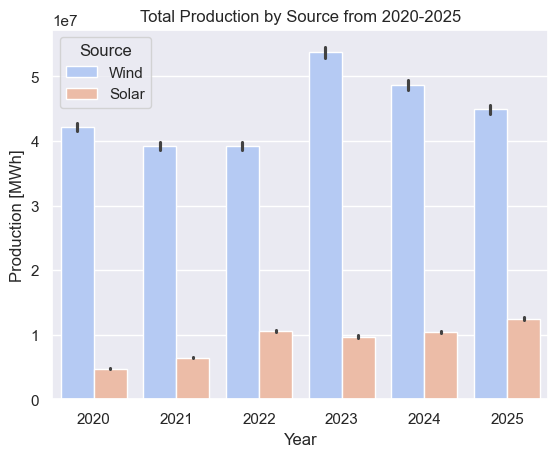

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Source",
            palette="coolwarm",
            estimator='sum')

plt.ylabel("Production [MWh]")
plt.title ("Total Production by Source from 2020-2025")

# Wind dominates dataset, so its normal it might have higher total production

In [23]:
from IPython.display import Markdown

report = f"""
### Observation: Total Production by Source and Year

Disaggregating the data reveals two distinct trends:

* **Solar Energy:** Shows a consistent, progressive increase in annual production, reflecting steady capacity growth.

* **Wind Energy:** Exhibits high volatility with no linear growth pattern. While production in the 2023-2025 period was generally higher than in 2020-2022, it fluctuates significantly, with 2023 standing out as an exceptional outlier.

**Key Insight on Scale:**

The absolute production from Wind significantly exceeds Solar output by a margin of at least 30 million MWh (3e7 MWh).
Since the *mean* and **median** production per unit for Wind is comparable to Solar (as seen in earlier graphs), this massive difference in *total* volume confirms that the grid's infrastructure is overwhelmingly dominated by Wind installations.

"""

display(Markdown(report))


### Observation: Total Production by Source and Year

Disaggregating the data reveals two distinct trends:

* **Solar Energy:** Shows a consistent, progressive increase in annual production, reflecting steady capacity growth.

* **Wind Energy:** Exhibits high volatility with no linear growth pattern. While production in the 2023-2025 period was generally higher than in 2020-2022, it fluctuates significantly, with 2023 standing out as an exceptional outlier.

**Key Insight on Scale:**

The absolute production from Wind significantly exceeds Solar output by a margin of at least 30 million MWh (3e7 MWh).
Since the *mean* and **median** production per unit for Wind is comparable to Solar (as seen in earlier graphs), this massive difference in *total* volume confirms that the grid's infrastructure is overwhelmingly dominated by Wind installations.



Text(0.5, 1.0, 'Average Production by Season from 2020-2025')

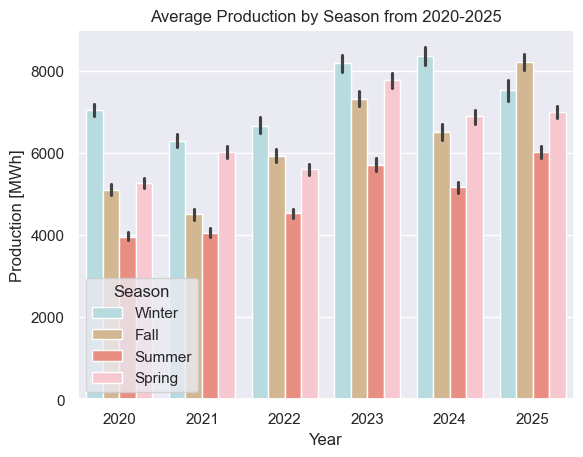

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data = df,
            x = "Year",
            y = "Production",
            hue = "Season",
            palette=seasons_palette)

plt.ylabel("Production [MWh]")
plt.title ("Average Production by Season from 2020-2025")

In [25]:
from IPython.display import Markdown

report = f"""
### Observation: Average Production by Season (2020-2025)

**Summer:** 
Average energy generation has trended upward over the 2020-2025 period. The growth pattern closely mirrors the Solar energy trends observed in the "Mean Production by Source" analysis, suggesting Solar expansion is the primary driver here. Notably, Summer consistently records the lowest average production, aligning with previous findings that Wind (the dominant source) is weakest in this season.

**Fall:** 
Average generation shows a general upward trend, though it is marked by significant year-to-year oscillations, reflecting the variable nature of Wind conditions during this transition season.

**Spring:** 
This season exhibits strong fluctuations ("volatility") in production, despite maintaining high overall output. This erratic pattern closely tracks the behavior of Wind energy, further confirming its dominance in the energy mix.

**Winter:** 
Winter consistently yields the highest energy production from 2020 to 2024. The observable dip in 2025 is likely an artifact of the dataset's truncation (ending in November 2025), which excludes December, typically a peak month for wind generation.

**Key Insight on Stability:**
The analysis confirms that the volatility of Wind energy dictates the overall production trend, introducing significant unpredictability into the grid. 

**Recommendation:** 
To mitigate the risks of this over-reliance, it is recommended to diversify the energy mix (e.g. Nuclear, Hydroelectric, Gas/Coal) with more consistent, dispatchable sources or storage solutions. This would buffer the grid against the inherent variability of Wind, which has been the defining characteristic throughout this analysis.
"""
display(Markdown(report))


### Observation: Average Production by Season (2020-2025)

**Summer:** 
Average energy generation has trended upward over the 2020-2025 period. The growth pattern closely mirrors the Solar energy trends observed in the "Mean Production by Source" analysis, suggesting Solar expansion is the primary driver here. Notably, Summer consistently records the lowest average production, aligning with previous findings that Wind (the dominant source) is weakest in this season.

**Fall:** 
Average generation shows a general upward trend, though it is marked by significant year-to-year oscillations, reflecting the variable nature of Wind conditions during this transition season.

**Spring:** 
This season exhibits strong fluctuations ("volatility") in production, despite maintaining high overall output. This erratic pattern closely tracks the behavior of Wind energy, further confirming its dominance in the energy mix.

**Winter:** 
Winter consistently yields the highest energy production from 2020 to 2024. The observable dip in 2025 is likely an artifact of the dataset's truncation (ending in November 2025), which excludes December, typically a peak month for wind generation.

**Key Insight on Stability:**
The analysis confirms that the volatility of Wind energy dictates the overall production trend, introducing significant unpredictability into the grid. 

**Recommendation:** 
To mitigate the risks of this over-reliance, it is recommended to diversify the energy mix (e.g. Nuclear, Hydroelectric, Gas/Coal) with more consistent, dispatchable sources or storage solutions. This would buffer the grid against the inherent variability of Wind, which has been the defining characteristic throughout this analysis.


In [26]:
from IPython.display import Markdown

report = f"""
---
# Executive Summary

This exploratory analysis reveals critical insights into renewable energy production patterns that directly impact grid management strategies and investment decisions.

## Key Findings

### 1. Source-Specific Production Characteristics

**Wind Energy:**
* Exhibits strong seasonal variation with peak output during winter months and significant decline in summer
* High volatility characterized by frequent outliers and right-skewed distribution
* Inherent unpredictability poses challenges for load forecasting and dispatch planning

**Solar Energy:**
* Demonstrates near-Gaussian distribution with more predictable behavior
* Winter production decreases are moderate compared to wind's seasonal swings
* Lower outlier frequency suggests higher reliability for baseline capacity planning

### 2. Grid Stability Implications

The current wind-to-solar generation mix presents stability concerns during periods of simultaneous low production on both sources of energy.

Two strategic pathways emerge:

* **Short-term:** Integrate dispatchable sources (battery storage, gas/coal sources) to address intermittency gaps and meet demand surges
* **Medium-term:** Expand solar capacity to improve generation predictability and reduce portfolio variance or explore alternative
dispatchable long term sources, e.g. nuclear or hydroelectric.

### 3. Historical Production Trends (2020-2024)

Analysis reveals an **oscillating growth pattern** with overall upward trajectory, indicating:
* Successful capacity additions despite year-to-year fluctuations
* Potential influence of external factors (grid constraints, weather anomalies)
* Need for deeper investigation into deviation causes

---
"""

display(Markdown(report))


---
# Executive Summary

This exploratory analysis reveals critical insights into renewable energy production patterns that directly impact grid management strategies and investment decisions.

## Key Findings

### 1. Source-Specific Production Characteristics

**Wind Energy:**
* Exhibits strong seasonal variation with peak output during winter months and significant decline in summer
* High volatility characterized by frequent outliers and right-skewed distribution
* Inherent unpredictability poses challenges for load forecasting and dispatch planning

**Solar Energy:**
* Demonstrates near-Gaussian distribution with more predictable behavior
* Winter production decreases are moderate compared to wind's seasonal swings
* Lower outlier frequency suggests higher reliability for baseline capacity planning

### 2. Grid Stability Implications

The current wind-to-solar generation mix presents stability concerns during periods of simultaneous low production on both sources of energy.

Two strategic pathways emerge:

* **Short-term:** Integrate dispatchable sources (battery storage, gas/coal sources) to address intermittency gaps and meet demand surges
* **Medium-term:** Expand solar capacity to improve generation predictability and reduce portfolio variance or explore alternative
dispatchable long term sources, e.g. nuclear or hydroelectric.

### 3. Historical Production Trends (2020-2024)

Analysis reveals an **oscillating growth pattern** with overall upward trajectory, indicating:
* Successful capacity additions despite year-to-year fluctuations
* Potential influence of external factors (grid constraints, weather anomalies)
* Need for deeper investigation into deviation causes

---


In [ ]:
from IPython.display import Markdown

report = f"""
# Recommended Next Steps

To transform these insights into actionable intelligence, the following analyses are proposed:

1. **Inter-Annual Consistency Testing**  
   Assess month-over-month stability across years to identify systematic patterns vs. anomalies driven by extreme weather events or operational disruptions

2. **Temporal Granularity Deep-Dive**  
   * Establish typical production profiles at weekly, daily, and hourly resolution
   * Identify optimal time windows for maintenance scheduling

3. **Correlation with Meteorological Data**  
   Cross-reference production anomalies with historical weather patterns to improve forecasting models

4. **Economic Optimization Modeling**  
   Evaluate cost-benefit scenarios for storage integration vs. solar expansion using production volatility metrics

   
## Business Value

These findings provide a foundation for:

* Risk-adjusted capacity planning and procurement strategies

* Improved accuracy in energy production strategies

* Data-driven grid modernization

"""

display(Markdown(report))


# Recommended Next Steps

To transform these insights into actionable intelligence, the following analyses are proposed:

1. **Inter-Annual Consistency Testing**  
   Assess month-over-month stability across years to identify systematic patterns vs. anomalies driven by extreme weather events or operational disruptions

2. **Temporal Granularity Deep-Dive**  
   * Establish typical production profiles at weekly, daily, and hourly resolution
   * Identify optimal time windows for maintenance scheduling

3. **Correlation with Meteorological Data**  
   Cross-reference production anomalies with historical weather patterns to improve forecasting models

4. **Economic Optimization Modeling**  
   Evaluate cost-benefit scenarios for storage integration vs. solar expansion using production volatility metrics


## Business Value

These findings provide a foundation for:
* Risk-adjusted capacity planning and procurement strategies
* Improved accuracy in energy production strategies
* Data-driven grid modernization

